# Feature selection methods

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing the MNIST dataset

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
X_train = X_train[:10000, :, :].reshape(10000, 28 * 28)
y_train = y_train[:10000]
X_test = X_test[:5000, :, :].reshape(5000, 28 * 28)
y_test = y_test[:5000]

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)
(5000, 784)
(5000,)


## Simple classifier model using Gaussian Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
accuracy = classifier.score(X_test, y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 53.5%


## Correlation Criteria

In [10]:
non_zero_columns = np.where((X_train != 0).any(axis = 0))[0]

In [11]:
non_zero_columns.shape

(673,)

In [12]:
X_train_no_zero_columns = X_train[:, non_zero_columns].copy()

In [13]:
# Computing the relevance between features and target
relevance = np.corrcoef(np.append(X_train_no_zero_columns, y_train.reshape(-1, 1), axis=1).T)[-1][:-1]

In [14]:
acc = []
for k in range (250, 401, 5):
    selected_features = np.argpartition(-relevance, k-1)[:k]
    classifier.fit(X_train_no_zero_columns[:, selected_features], y_train)
    acc.append((k, classifier.score(X_test[:, non_zero_columns][:, selected_features], y_test)))

In [15]:
acc

[(250, 0.4334),
 (255, 0.4412),
 (260, 0.4462),
 (265, 0.4532),
 (270, 0.4608),
 (275, 0.477),
 (280, 0.4852),
 (285, 0.4808),
 (290, 0.4916),
 (295, 0.4916),
 (300, 0.4948),
 (305, 0.4958),
 (310, 0.5016),
 (315, 0.506),
 (320, 0.5118),
 (325, 0.5108),
 (330, 0.5086),
 (335, 0.5122),
 (340, 0.5014),
 (345, 0.502),
 (350, 0.4962),
 (355, 0.4864),
 (360, 0.4846),
 (365, 0.4682),
 (370, 0.4706),
 (375, 0.4678),
 (380, 0.4652),
 (385, 0.462),
 (390, 0.461),
 (395, 0.4602),
 (400, 0.4616)]

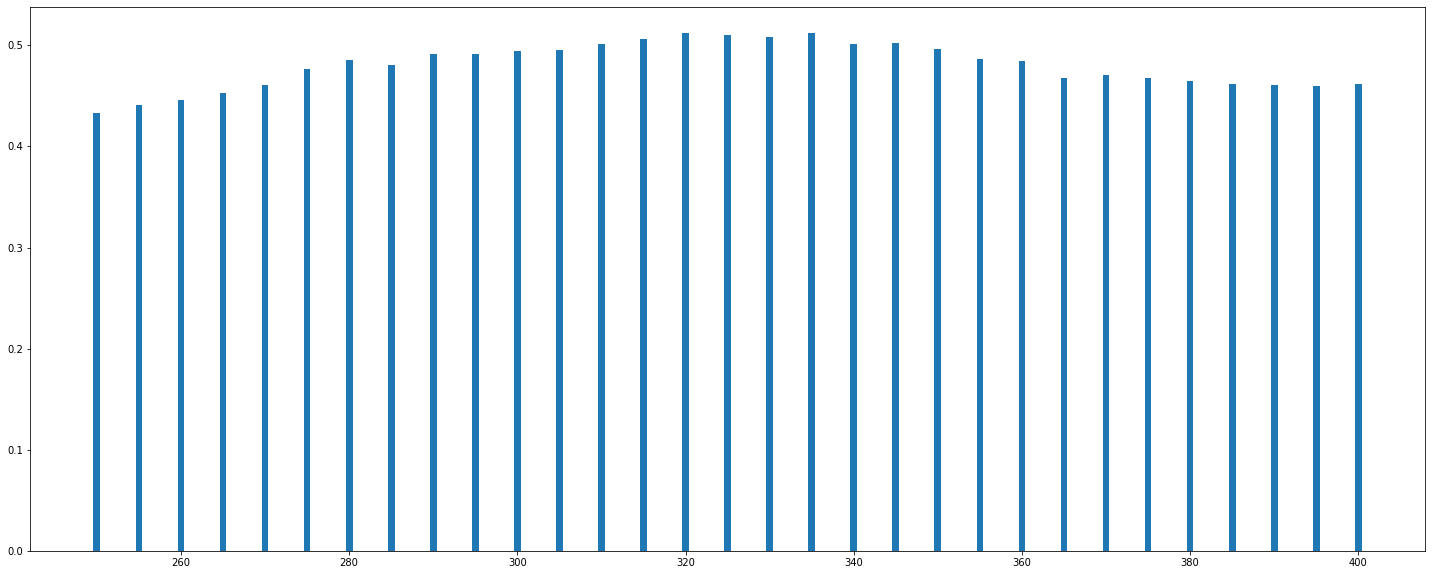

In [16]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.bar([a[0] for a in acc], [a[1] for a in acc])
plt.show();

In [17]:
# Select top relevant features
k = 335
selected_features = np.argpartition(-relevance, k-1)[:k]

In [18]:
classifier.fit(X_train_no_zero_columns[:, selected_features], y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
accuracy = classifier.score(X_test[:, non_zero_columns][:, selected_features], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 51.22%


## Mutual Information

In [20]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train, y_train)

In [21]:
mi.shape

(784,)

In [22]:
k = 400
selected_features_mi = np.argpartition(-mi, k - 1)[:k]

In [23]:
classifier.fit(X_train[:, selected_features_mi], y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
accuracy = classifier.score(X_test[:, selected_features_mi], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 67.42%


In [25]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [26]:
skb = SelectKBest(score_func=mutual_info_classif, k=400)
X_train_mi = skb.fit_transform(X_train, y_train)
X_test_mi = skb.transform(X_test)

In [27]:
classifier.fit(X_train_mi, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
accuracy = classifier.score(X_test_mi, y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 68.34%


## Chi-square Statistics

In [29]:
from sklearn.feature_selection import chi2, SelectKBest
skb = SelectKBest(score_func=chi2, k=400)
X_train_chi2 = skb.fit_transform(X_train, y_train)
X_test_chi2 = skb.transform(X_test)

In [30]:
X_train_chi2.shape

(10000, 400)

In [31]:
classifier.fit(X_train_chi2, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
accuracy = classifier.score(X_test_chi2, y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 67.46%


## Fast Correlation-based Filter

In [10]:
import fcbf

In [33]:
sbest = fcbf.fcbf(X_train, y_train, threshold=1e-5)

In [34]:
sbest

array([[1.53599188e-01, 5.67000000e+02],
       [1.52055928e-01, 3.78000000e+02],
       [1.15814052e-01, 1.00000000e+02],
       [1.03288468e-01, 7.12000000e+02],
       [6.10964145e-02, 7.17000000e+02],
       [2.10051203e-02, 7.35000000e+02],
       [3.41024943e-03, 7.23000000e+02],
       [1.24563366e-03, 1.95000000e+02],
       [3.91490904e-04, 7.03000000e+02],
       [2.12959092e-04, 3.07000000e+02],
       [2.05158310e-04, 3.35000000e+02],
       [2.01904041e-04, 4.47000000e+02],
       [2.01904041e-04, 3.93000000e+02],
       [2.00933508e-04, 6.70000000e+02],
       [1.98938573e-04, 5.10000000e+01]])

In [35]:
print("Number of selected features: {}".format(sbest.shape[0]))

Number of selected features: 15


In [36]:
classifier.fit(X_train[:, sbest[:, 1].astype(np.int)], y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
accuracy = classifier.score(X_test[:, sbest[:, 1].astype(np.int)], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 29.12%


## Sequential Forward Selection

In [47]:
from mlxtend.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(estimator=GaussianNB(), k_features=200, forward=True, n_jobs=4)

In [48]:
X_train_sfs = sfs.fit_transform(X_train, y_train)

In [49]:
classifier.fit(X_train_sfs, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
classifier.score(sfs.transform(X_test), y_test)

0.8114

## Particles Swarm Optimization

In [51]:
import pyswarms as ps

In [86]:
def f_per_particle(mask, classifier):
    """ Computes for the objective function per particle
    
    Parameters
    ----------
    mask : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will be used to mask features
        
    alpha : float, default: 0.5
        Constant weight for trading-off classifier performance and number of features
        
    Returns
    -------
    numpy.ndarray
        Computed objective function    
    """
    
    total_features = X_train.shape[1]
    # Get the subset of the features from the binary mask
    m = mask.copy()
    if np.count_nonzero(m) == 0:
        m = np.ones(mask.shape, dtype=np.int)
    classifier.fit(X_train[:, m==1], y_train)
    
    # Compute for the objective function
    objective_value = 1 - classifier.score(X_test[:, m==1], y_test)
    return objective_value

In [87]:
def f(x):
    """Higher-level method to do classification in the whole swarm.
    
    Parameters
    ----------
    x : numpy.ndarray, shape (n_particles, dimensions)
        The swarm that will perform the search
    
    Returns
    -------
    numpy.ndarray, shape (n_particles,)
        The computed loss for each particle
    
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], classifier=GaussianNB()) for i in range(n_particles)]
    return np.array(j)

In [100]:
options = {'c1': 2, 'c2': 2, 'w': 0.3, 'k': 20, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=20, dimensions=X_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=10)

2019-10-14 15:46:18,080 - pyswarms.discrete.binary - INFO - Optimize for 10 iters with {'c1': 2, 'c2': 2, 'w': 0.3, 'k': 20, 'p': 2}



pyswarms.discrete.binary:   0%|          |0/10


pyswarms.discrete.binary:   0%|          |0/10, best_cost=0.42


pyswarms.discrete.binary:  10%|█         |1/10, best_cost=0.42


pyswarms.discrete.binary:  10%|█         |1/10, best_cost=0.42


pyswarms.discrete.binary:  20%|██        |2/10, best_cost=0.42


pyswarms.discrete.binary:  20%|██        |2/10, best_cost=0.42


pyswarms.discrete.binary:  30%|███       |3/10, best_cost=0.42


pyswarms.discrete.binary:  30%|███       |3/10, best_cost=0.42


pyswarms.discrete.binary:  40%|████      |4/10, best_cost=0.42


pyswarms.discrete.binary:  40%|████      |4/10, best_cost=0.419


pyswarms.discrete.binary:  50%|█████     |5/10, best_cost=0.419


pyswarms.discrete.binary:  50%|█████     |5/10, best_cost=0.418


pyswarms.discrete.binary:  60%|██████    |6/10, best_cost=0.418


pyswarms.discrete.binary:  60%|

In [101]:
cost

0.41800000000000004

In [102]:
classifier.fit(X_train[:, pos==1], y_train)

In [102]:
accuracy = classifier.score(X_test[:, pos==1], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

0.582

In [104]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 375


## Genetic Algorithms (GA)

Note: When applying GA to a given problem, we have to determine the representation of the gene, the suitable fitness function, and how the crossover and the mutation are applied. Let’s see how things work.

In [10]:
import genetic_algorithm

In [11]:
"""
Genetic algorithm parameters:
    Population size
    Mating pool size
    Number of mutations
"""
sol_per_pop = 30 # Population size.
num_parents_mating = 20 # Number of parents inside the mating pool.
num_mutations = 20 # Number of elements to mutate.

In [12]:
# Defining the population shape
pop_shape = (sol_per_pop, X_train.shape[1])

In [18]:
# Creating the initial population.
new_population = np.random.randint(low=0, high=2, size=pop_shape)
print(new_population.shape)

(30, 784)


In [19]:
best_outputs = []
num_generations = 50

In [20]:
for generation in range(num_generations):
    print('Generation: {}'.format(generation))
    # Measuring the fitness of each chromosome in the population.
    fitness = genetic_algorithm.cal_pop_fitness(new_population, X_train, y_train, X_test, y_test)
    # The best result in the current generation
    best_outputs.append(np.max(fitness))
    print('Best result: {}'.format(best_outputs[-1]))
    
    # Selecting the best parents in the population for mating.
    parents = genetic_algorithm.select_mating_pool(new_population, fitness, num_parents_mating)
    
    # Generating next generation using crossover.
    offspring_crossover = genetic_algorithm.crossover(parents, offspring_size=(pop_shape[0] - parents.shape[0], X_train.shape[1]))
    
    # Adding some variations to the offspring using mutation.
    offspring_mutation = genetic_algorithm.mutation(offspring_crossover, num_mutations=num_generations)
    
    # Creating the new population based on the parents and offspring.
    new_population[0: parents.shape[0], :] = parents.copy()
    new_population[parents.shape[0]:, :] = offspring_mutation.copy()    

Generation: 0
Best result: 0.5508
Generation: 1
Best result: 0.5562
Generation: 2
Best result: 0.5848
Generation: 3
Best result: 0.5848
Generation: 4
Best result: 0.5848
Generation: 5
Best result: 0.5848
Generation: 6
Best result: 0.5848
Generation: 7
Best result: 0.5848
Generation: 8
Best result: 0.5848
Generation: 9
Best result: 0.5848
Generation: 10
Best result: 0.5848
Generation: 11
Best result: 0.5848
Generation: 12
Best result: 0.603
Generation: 13
Best result: 0.603
Generation: 14
Best result: 0.604
Generation: 15
Best result: 0.6116
Generation: 16
Best result: 0.6116
Generation: 17
Best result: 0.6116
Generation: 18
Best result: 0.6116
Generation: 19
Best result: 0.613
Generation: 20
Best result: 0.6152
Generation: 21
Best result: 0.629
Generation: 22
Best result: 0.629
Generation: 23
Best result: 0.629
Generation: 24
Best result: 0.629
Generation: 25
Best result: 0.629
Generation: 26
Best result: 0.629
Generation: 27
Best result: 0.629
Generation: 28
Best result: 0.629
Generat

In [21]:
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = genetic_algorithm.cal_pop_fitness(new_population, X_train, y_train, X_test, y_test)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))[0]
best_match_idx = best_match_idx[0]

best_solution = new_population[best_match_idx, :]

In [23]:
classifier.fit(X_train[:, best_solution == 1], y_train)

In [23]:
accuracy = classifier.score(X_test[:, best_solution == 1], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

0.6606

In [25]:
print('Number of features: {}'.format(np.count_nonzero(best_solution)))

Number of features: 372
